# Predicting Car Prices

In this project we will be working with a cars dataset. The dataset can be downloaded from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data) and more information on the dataset is available [here](https://archive.ics.uci.edu/ml/datasets/automobile).The dataset contains technical aspects of the vehicle such as motor's displacement,weight of the car,miles per gallon etc.

The objective of this project is to determine the price of the car using the available features. We will be using the KNN Algorithm to predict the car price.

In [1]:
# Import and explore the dataset

import pandas as pd
import numpy as np
cars=pd.read_csv("imports-85.data")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
cars.head(3)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


When we look at the documentation of the dataset we can see that the column names do not match. We can correct this by specifying column names and passing the column names as names parameter while reading the file.

In [3]:
col_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars=pd.read_csv("imports-85.data",names=col_names)

In [4]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

From the above we can see that **symboling,wheel base,length,width,height,curb-weight,engine-size,compression-rate,city-mpg  and highway-mpg** are all integer/float columns and can be used as features in KNN algorithm. Our target variable will be price. But we can see from above that **price** is not a numeric column. We will need to convert this column to numeric. 

We can see that normalized-losses,bore,stroke,horsepower,peak-rpm and price are the columns which are actually numeric but now appear to be of object type. We will need to convert them to float. Also the columns like num-of-doors  and num-of-cylinders have string values like two,three,four but then can also be converted to numbers.

# Datatype conversion of required columns

In [6]:
# Convert the string columns to float

import re
import numpy as np

cols_to_be_converted=["normalized-losses","bore","stroke","horsepower","peak-rpm","price"]

for i in cols_to_be_converted:
    cars[i]=cars[i].replace("?",np.nan)
    cars[i]=cars[i].astype("float")

# Dealing with Missing Values

As we all know for the KNN algorithm to work we will need to clean the dataset for missing values. If there are any missing values in the dataset we will need to either replace them or delete them.

In [7]:
cars.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Because Price is the column we wan to predict we will get rid of the null values in that particular column. Also bore,stroke and peak-rpm have very low number of na values hence we will get rid of them as well. 

In [8]:
cars.dropna(subset=["price","bore","stroke","peak-rpm"],inplace=True)

In [9]:
cars.isnull().sum()

symboling             0
normalized-losses    35
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-rate      0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

For the normalized-losses column we now have ~35 NULL values. For this column we can replace the null values of the column by column means.

In [10]:
#Get the mean of all columns in dataframe
cars_dfmean=cars.mean()

#Replace the NaN values with means of the respective columns
cars.fillna(cars_dfmean,inplace=True)

In [11]:
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now we do not have any null values in the data. Now we will proceed with building model for the data.

# Outlier Treatment

Before we actually start building in the model we need to take care of any outliers present in the data. The reason we are doing this is we will be using K Nearest Neighbours method to predict prices. Since it involves computing distance metrics it may get inflated by outliers.

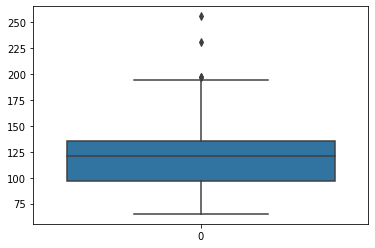

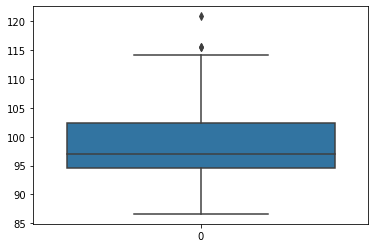

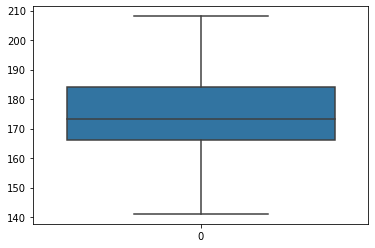

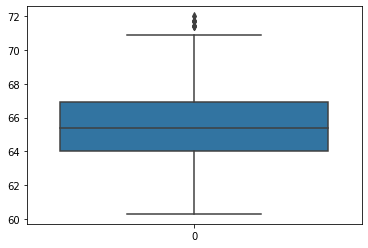

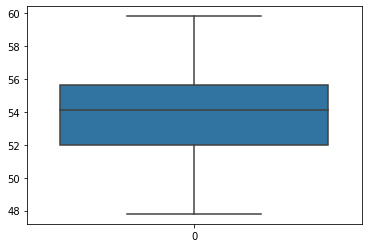

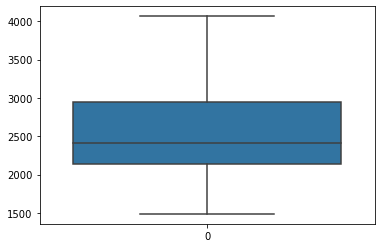

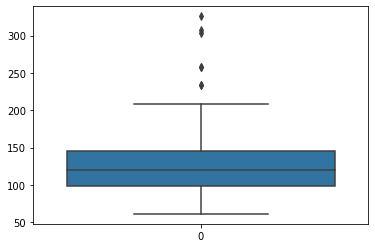

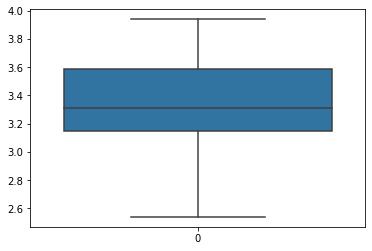

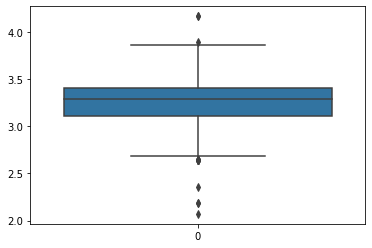

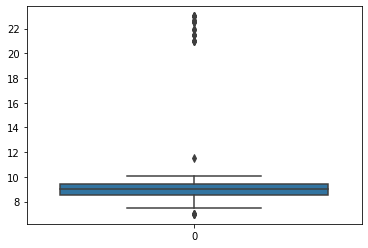

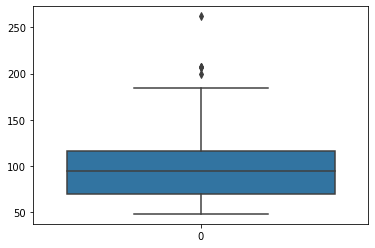

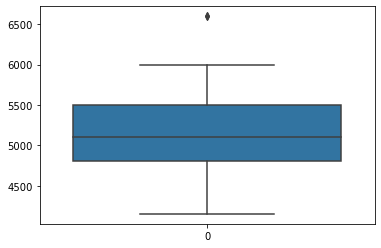

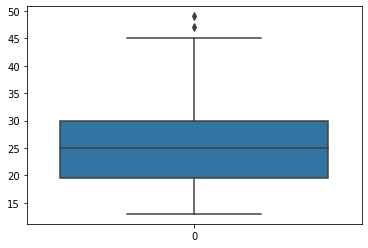

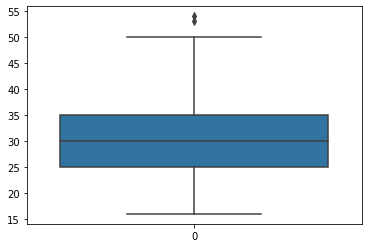

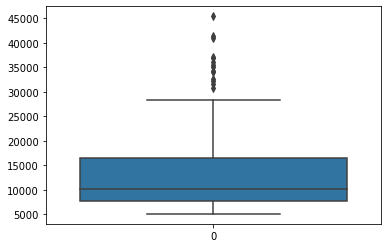

In [12]:
import seaborn as sns
import matplotlib .pyplot as plt
%matplotlib inline
numeric_cols=['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars_numeric=cars[numeric_cols].copy()

for column in cars_numeric:
    plt.figure()
    sns.boxplot(data=cars_numeric[column],orient="vertical")


From the above plots we can see that we have a few outliers for most of the columns. We can either get rid of them or replace them with lower limit if they are lesser or with upper limit if they are greater.

We have outliers for normalized losses,wheel-base,width,engine-size,stroke,compression-rate,horsepower,peak_rpm,city-mpg,highway-mpg and price

In [13]:
cars_numeric.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,121.300000,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,32.231252,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,96.500000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,121.300000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,135.500000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [14]:
# Outlier function
'''
def outlier_detection(column_name):
    column=cars_numeric[column_name]
    Q1=np.percentile(column,25)
    Q2=np.percentile(column,50)
    Q3=np.percentile(column,75)
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    cars_numeric[column]=np.where(column<low_lim,low_lim,column)
    cars_numeric[column]=np.where(column>up_lim,up_lim,column)
'''

'\ndef outlier_detection(column_name):\n    column=cars_numeric[column_name]\n    Q1=np.percentile(column,25)\n    Q2=np.percentile(column,50)\n    Q3=np.percentile(column,75)\n    IQR=Q3-Q1\n    low_lim=Q1-1.5*IQR\n    up_lim=Q3+1.5*IQR\n    cars_numeric[column]=np.where(column<low_lim,low_lim,column)\n    cars_numeric[column]=np.where(column>up_lim,up_lim,column)\n'

In [15]:
cars_numeric.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,121.300000,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,32.231252,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,96.500000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,121.300000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,135.500000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
for column_name in numeric_cols:
    Q1=np.percentile(cars_numeric[column_name],25)
    Q2=np.percentile(cars_numeric[column_name],50)
    Q3=np.percentile(cars_numeric[column_name],75)
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    cars_numeric[column_name]=np.where(cars_numeric[column_name]<low_lim,low_lim,cars_numeric[column_name])
    cars_numeric[column_name]=np.where(cars_numeric[column_name]>up_lim,up_lim,cars_numeric[column_name])
    



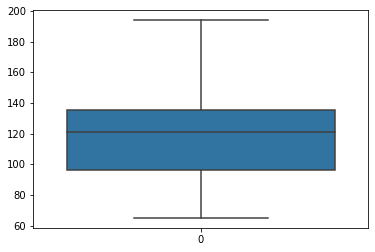

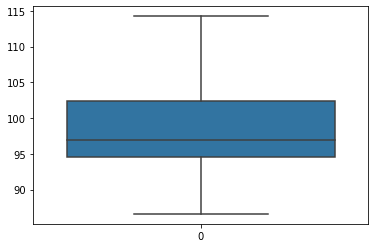

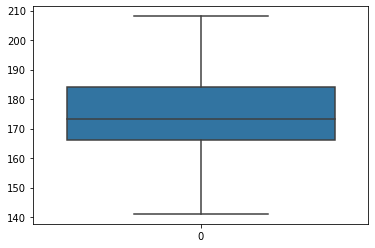

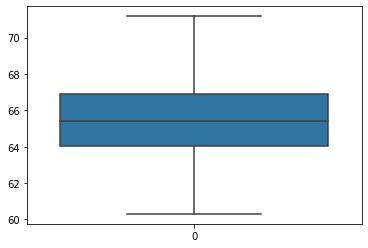

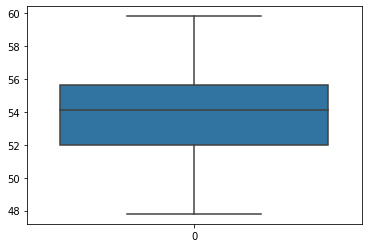

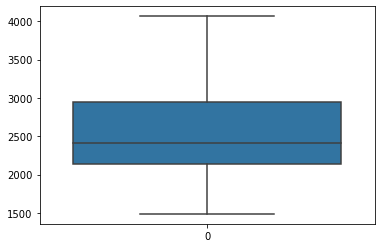

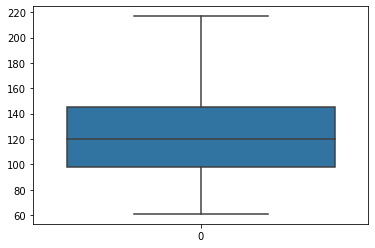

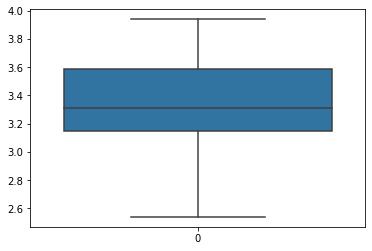

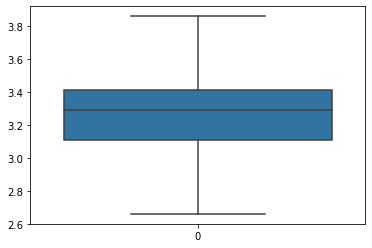

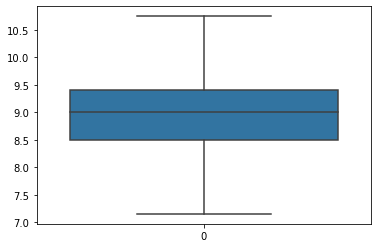

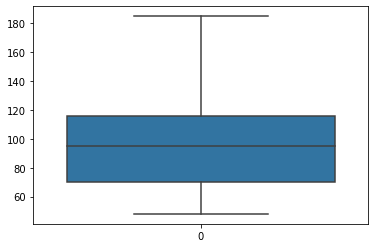

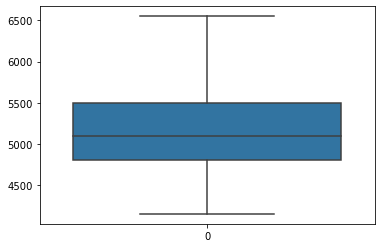

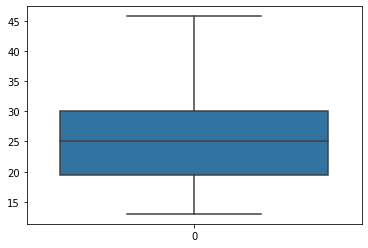

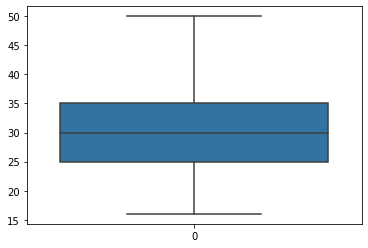

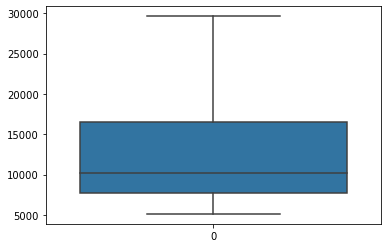

In [17]:
for column in cars_numeric:
    plt.figure()
    sns.boxplot(data=cars_numeric[column],orient="vertical")


# Univariate Model

At the start we can built up a univariate KNN model which will take in only one input variable and return the prediction. 
We can proceed with passing every single variable to the model and checking for the accuracy and the model  which gives us the best accuracy can be chosen as the best model.

In [18]:
# Funcion for knn univariate model

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def knn_uni_model(training_col,target_col,dataframe):
    '''
    Function takes in three inputs input variable,target variable and 
    dataframe
    '''
    normalized_data=(dataframe-dataframe.mean())/dataframe.std()
    '''
    Since KNN is a distance based algorithm it will be affected by the 
    magnitude of the values.Higher the value can mean higher distance resulting
    in incorrect interpretation. To avoid this we will be standardizing the values.
    '''
    normalized_data[target_col]=dataframe[target_col]
    '''
    We do not want target column to be normalized since that is not going as 
    a input to the model.Hence we assign back the original values to the target 
    column.
    '''
    train_set,test_set=train_test_split(normalized_data,train_size=0.8,random_state=0)
    '''
    Split the data into train and test set randomly
    Model will be trained on 80% of the data and will be tested on the remianing
    20%. This will help to look at the accuracy of the model.
    Random state is used to get the same splits every time
    '''
    knn=KNeighborsRegressor()
    '''
    Call the instance of the KNeighborsregressor Class
    Default parameters will be k=5
    '''
    knn.fit(train_set[[training_col]],train_set[[target_col]])
    '''
    Fit the model to the train set using instance of KNeighborsRegressor class
    We pass two parameters input variables and target variable(which we want to predict)
    '''
    predictions=knn.predict(test_set[[training_col]])
    '''
    Using the trained model we will make predictions on the test set.
    '''
    mse=mean_squared_error(test_set[[target_col]],predictions)
    rmse=mse**(1/2)
    return rmse

In [19]:
# Testing the function
knn_uni_model('normalized-losses','price',cars_numeric)

6263.973987531746

Now that we have built up a function for a univariate model we will look at which variable gives us the lowest rmse value.

In [34]:
#
rmse_values={}
input_var=cars_numeric.columns

for var in input_var:
    if var!='price':
        '''
        Exclude price since that is our target variable
        '''
        rmse = knn_uni_model(var,'price',cars_numeric)
        rmse_values[var]=rmse
        
sorted(rmse_values.items(),key=lambda x:x[1])
# x[0] for key and x[1] for values 

[('horsepower', 2254.539883981106),
 ('engine-size', 2505.744961353041),
 ('city-mpg', 2978.562714406706),
 ('curb-weight', 3020.4802366511194),
 ('width', 3028.8089990761414),
 ('highway-mpg', 3301.048081738392),
 ('length', 3727.566381814459),
 ('wheel-base', 4122.3541312922225),
 ('compression-rate', 5078.108434666472),
 ('bore', 5571.000296562088),
 ('stroke', 6253.829600824909),
 ('normalized-losses', 6263.973987531746),
 ('peak-rpm', 6945.102311166057),
 ('height', 7395.4336442999465)]

By keeping the default parametes of KNeighborsRegressor we can see that horsepower variable is giving us the lowest RMSE which means horsepower able to predict the car price in a more better way compared to other variables.

Further we will check by passing different k values to the KNeighborsRegressor class and check for the best input variable.

In [21]:
# Update the above function to pass different values for k
def knn_uni_model_updated(training_col,target_col,dataframe):
   
    normalized_data=(dataframe-dataframe.mean())/dataframe.std()
    
    normalized_data[target_col]=dataframe[target_col]
    
    train_set,test_set=train_test_split(normalized_data,train_size=0.8,random_state=0)
    rmse_values_k={}
    for k in [1,3,5,7,9]:
        '''
        Using a for loop to iterate over different values of k
        '''
        knn=KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[[training_col]],train_set[[target_col]])
        predictions=knn.predict(test_set[[training_col]])
        mse=mean_squared_error(test_set[[target_col]],predictions)
        rmse=mse**(1/2)
        rmse_values_k[k]=rmse
    return rmse_values_k
        

In [22]:
# Test the function
knn_uni_model_updated('normalized-losses','price',cars_numeric)

{1: 7153.700487626433,
 3: 5568.589256012007,
 5: 6263.973987531746,
 7: 6908.885394078217,
 9: 6866.277414221188}

In [23]:
rmse_values_updated={}
input_var=cars_numeric.columns

for var in input_var:
    if var!='price':
        '''
        Exclude price since that is our target variable
        '''
        rmse = knn_uni_model_updated(var,'price',cars_numeric)
        rmse_values_updated[var]=rmse
        
rmse_values_updated

{'normalized-losses': {1: 7153.700487626433,
  3: 5568.589256012007,
  5: 6263.973987531746,
  7: 6908.885394078217,
  9: 6866.277414221188},
 'wheel-base': {1: 2094.493433646843,
  3: 4362.1051964839535,
  5: 4122.3541312922225,
  7: 3441.69885214848,
  9: 3272.2158215156833},
 'length': {1: 3500.2845964878707,
  3: 3528.4102942534923,
  5: 3727.566381814459,
  7: 3394.919875776863,
  9: 3728.0528268478342},
 'width': {1: 3978.2685360432615,
  3: 3316.039953807747,
  5: 3028.8089990761414,
  7: 2977.43772671578,
  9: 2735.3318213624852},
 'height': {1: 8293.438773361748,
  3: 8178.82082101435,
  5: 7395.4336442999465,
  7: 7053.7599815341855,
  9: 7164.769271538858},
 'curb-weight': {1: 3804.6612529895483,
  3: 3052.0738306202516,
  5: 3020.4802366511194,
  7: 2688.110181111274,
  9: 3009.781774312},
 'engine-size': {1: 3211.817426487649,
  3: 2081.458680707907,
  5: 2505.744961353041,
  7: 2696.071837796451,
  9: 2742.3833413883926},
 'bore': {1: 5688.422938780899,
  3: 5159.01866427

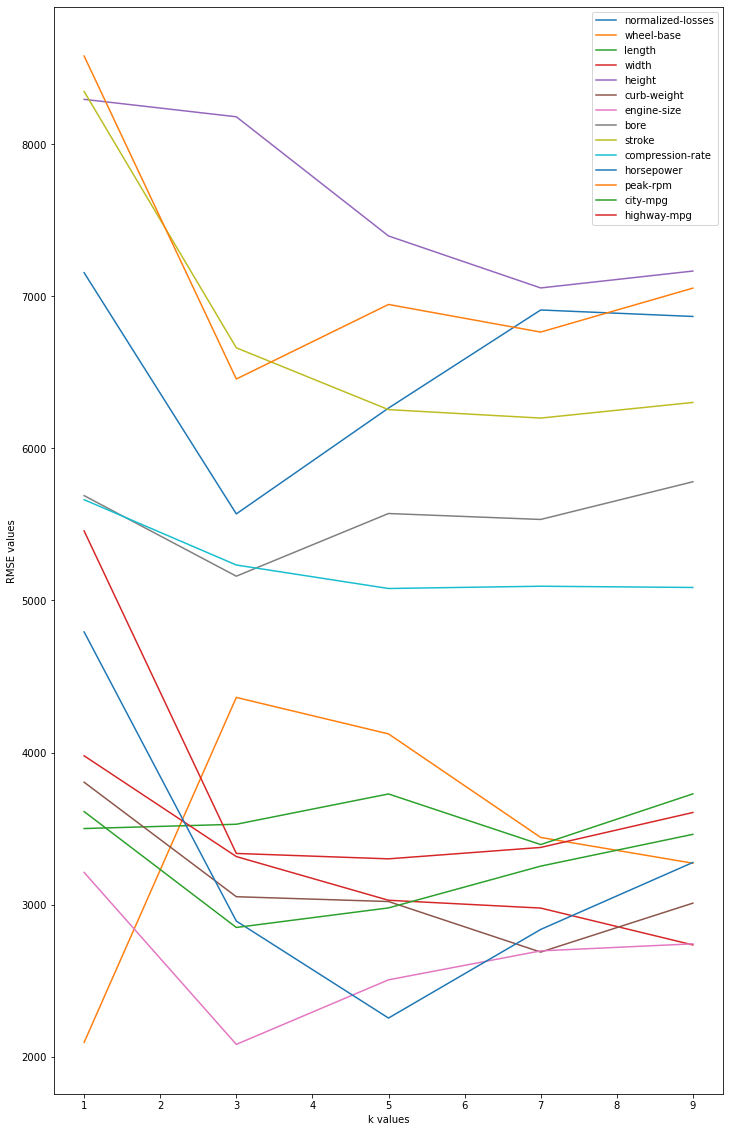

In [47]:
# Visualize the results using scatter plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,20))

for k,v in rmse_values_updated.items():
    '''
    Iterate over key value pairs in the dictionary
    '''
    x=list(v.keys())
    y=list(v.values())
    plt.plot(x,y,label=k)
    plt.xlabel("k values")
    plt.ylabel("RMSE values")
    plt.legend(loc='upper right')
    
    

# Multivariate Model

In the above steps we have trained a knn model which will take one input variable at a time. However it will not be a good idea to make predcitions using only one variable at a time. Hence we will be making a multivariate model which will take in more than one input variable at a time.

To do so we can take help from the Univariate model. What we can do is we can first build the model on the best two features i.e. the top two features which will give the lowest RMSE values then move to best three,best four and so on and calculate the RMSE values for each model and select the best one to work with.

In [25]:
# Funcion for knn multivariate model


def knn_multi_model(training_cols_list,target_col,dataframe):
    '''
    Pass a list of columns as training_cols_list
    '''
    normalized_data=(dataframe-dataframe.mean())/dataframe.std()
    normalized_data[target_col]=dataframe[target_col]
    train_set,test_set=train_test_split(normalized_data,train_size=0.8,random_state=0)
    knn=KNeighborsRegressor()
    knn.fit(train_set[training_cols_list],train_set[[target_col]])
    predictions=knn.predict(test_set[training_cols_list])
    mse=mean_squared_error(test_set[[target_col]],predictions)
    rmse=mse**(1/2)
    return rmse

In [26]:
'''
Use the older results of knn univariate model with default parameters and then
sort then on the rmse values and get the order of the variables accordingly
'''


a=sorted(rmse_values.items(),key=lambda x:x[1])

sorted_var_list=[k for k,v in sorted(rmse_values.items(),key=lambda x:x[1])]

sorted_var_list
   

['horsepower',
 'engine-size',
 'city-mpg',
 'curb-weight',
 'width',
 'highway-mpg',
 'length',
 'wheel-base',
 'compression-rate',
 'bore',
 'stroke',
 'normalized-losses',
 'peak-rpm',
 'height']

In [27]:
# Trying out multiple models with best 2,best 3 features and so on

knn_multi_rmse={}
for k in range(1,len(sorted_var_list)):
    '''
    Starting with 1 because 0 will consider only one variable and 
    we want a model which starts with one or more variables
    '''
    cols=sorted_var_list[0:k+1]
    '''
    k+1 because the last index is omitted in python
    '''
    rmse=knn_multi_model(cols,'price',cars_numeric)
    knn_multi_rmse[k+1]=rmse


sorted(knn_multi_rmse.items(),key=lambda x:x[1])




[(3, 1845.9687986813667),
 (5, 1851.5848981172583),
 (2, 1902.7878126748928),
 (4, 1926.328440340355),
 (12, 2039.380094868574),
 (8, 2080.345915516246),
 (7, 2136.055549311298),
 (6, 2158.166860068386),
 (14, 2159.3233612698314),
 (11, 2182.6152720314976),
 (13, 2210.839692448353),
 (9, 2339.6516129132756),
 (10, 2380.9402232586117)]

From the above we can see that the model with top three best features as per univariate model gives the lowest RMSE. The top three best features as per univariate model were **horsepower,engine-size and city-mpg**.

But we have trained the above model on a default parameters of KNeighbors class. Let's try to build multivariate model based on different values of k.

In [28]:
# Funcion for knn multivariate model with different values of k


def knn_multi_model_updated(training_cols_list,target_col,dataframe):
    normalized_data=(dataframe-dataframe.mean())/dataframe.std()
    normalized_data[target_col]=dataframe[target_col]
    train_set,test_set=train_test_split(normalized_data,train_size=0.8,random_state=0)
    rmse_val_k={}
    for n in range(1,10):
        '''
        For loop to iterate over different values of k
        '''
        knn=KNeighborsRegressor(n_neighbors=n)
        knn.fit(train_set[training_cols_list],train_set[[target_col]])
        predictions=knn.predict(test_set[training_cols_list])
        mse=mean_squared_error(test_set[[target_col]],predictions)
        rmse=mse**(1/2)
        rmse_val_k[n]=rmse
    return rmse_val_k
        
    

In [29]:
# Trying out multiple models with best 2,best 3 features and so on

knn_multi_rmse_k={}
for k in range(1,len(sorted_var_list)):
    '''
    Starting with 1 because 0 will consider only one variable and 
    we want a model which starts with one or more variables
    '''
    cols=sorted_var_list[0:k+1]
    '''
    k+1 because the last index is omitted in python
    '''
    rmse_k=knn_multi_model_updated(cols,'price',cars_numeric)
    knn_multi_rmse_k[k+1]=rmse_k


knn_multi_rmse_k


{2: {1: 2090.6844914114145,
  2: 1723.6746232194662,
  3: 1544.7240628596076,
  4: 1784.012754442305,
  5: 1902.7878126748928,
  6: 2139.5324512296306,
  7: 2311.353921588773,
  8: 2409.480407751127,
  9: 2609.162063447597},
 3: {1: 1815.2134582573096,
  2: 2047.183376555112,
  3: 1828.3492995450083,
  4: 1710.5206200647413,
  5: 1845.9687986813667,
  6: 1978.9995042766811,
  7: 2117.5082020865884,
  8: 2307.966298344686,
  9: 2437.3154454405885},
 4: {1: 1897.3703263856316,
  2: 1539.5036230709943,
  3: 1497.576900472104,
  4: 1817.3033047023414,
  5: 1926.328440340355,
  6: 2023.0899896701133,
  7: 2027.0963677062368,
  8: 2037.1272496803495,
  9: 2087.3863027772313},
 5: {1: 1685.156403473181,
  2: 1276.8562361348322,
  3: 1401.1155702396898,
  4: 1653.9525871853314,
  5: 1851.5848981172583,
  6: 1960.482555683575,
  7: 2030.6585812280646,
  8: 2153.6305284797854,
  9: 2118.445624522621},
 6: {1: 1677.7782322090006,
  2: 1255.4001896678003,
  3: 1734.468562387412,
  4: 1836.28112027

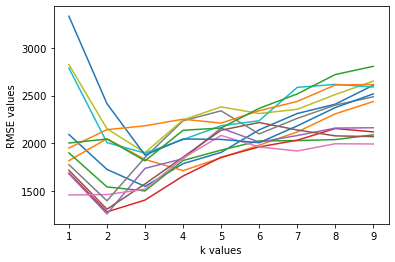

In [30]:
# Visualize the results using scatter plot

for k,v in knn_multi_rmse_k.items():
    '''
    Iterate over key value pairs in the dictionary
    '''
    x=list(v.keys())
    y=list(v.values())
    plt.plot(x,y)
    plt.xlabel("k values")
    plt.ylabel("RMSE values")
    

# Conclusion

We have built up all possible models using both univariate and multivariate models and also plotted the RMSE values against different values of k. We should mostly prefer a multivariate model since it is not a good method to determine the price using the impact of only one single variable. Mostly we will be selecting the model with the lowest RMSE values. However sometimes we might need to make a decision based on other factors like data availability for the variables in the future and domain knowledge. In some cases a multiavariate model with certain variables might have the lowest RMSE however the variables do not really make business conetxt and also it would become difficult to capture those in the future.

For our case in the multivariate models we tried two cases:
1. With the default KNeighnors class
2. By training the models with different parameters of k

From the first case we got to know that the model with variables **horsepower,engine-size and city-mpg** gives us the lowest RMSE with default k value of 5.

From the second case we get to know that for this particular set of variables when we hypertune the k parameter the RMSE turns out to be the lowest at k=4.

Hence in our scenario the best model to predict car price using KNN algorithm will be using the variables **horsepower,engine-size and city-mpg** with the **k value of 4**.